In [4]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all, predict
import math

In [7]:
plot_every = 15
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, 
                max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    print_every = n_epochs * len(index_array_pairs)/25.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_epochs, max_length, 
        math.floor(print_every), plot_every = math.floor(plot_every), 
        learning_rate = learning_rate, max_hours = max_hours,
        clip = clip)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


Data files preprocessed ...

28 inputs constructed for training ...

0m 6s (- 2m 34s) (56 4%) 4.4153
0m 14s (- 2m 41s) (112 8%) 4.1157
0m 21s (- 2m 39s) (168 12%) 3.9477
0m 29s (- 2m 35s) (224 16%) 3.7621
0m 36s (- 2m 24s) (280 20%) 3.5442
0m 43s (- 2m 17s) (336 24%) 3.3162
0m 50s (- 2m 10s) (392 28%) 3.0960
0m 57s (- 2m 1s) (448 32%) 2.8941
1m 3s (- 1m 53s) (504 36%) 2.7125
1m 10s (- 1m 45s) (560 40%) 2.5456
1m 16s (- 1m 37s) (616 44%) 2.3885
1m 23s (- 1m 30s) (672 48%) 2.2502
1m 30s (- 1m 23s) (728 52%) 2.1196
1m 36s (- 1m 16s) (784 56%) 2.0005
1m 43s (- 1m 8s) (840 60%) 1.8885
1m 50s (- 1m 2s) (896 64%) 1.7870
1m 58s (- 0m 55s) (952 68%) 1.6709
2m 6s (- 0m 49s) (1008 72%) 1.5721
2m 13s (- 0m 42s) (1064 76%) 1.4751
2m 20s (- 0m 35s) (1120 80%) 1.3918
2m 27s (- 0m 28s) (1176 84%) 1.2958
2m 33s (- 0m 20s) (1232 88%) 1.2127
2m 42s (- 0m 14s) (1288 92%) 1.1193
2m 50s (- 0m 7s) (1344 96%) 1.0418
2m 58s (- 0m 0s) (1400 100%) 0.9627
Training finished ...



<Figure size 432x288 with 0 Axes>

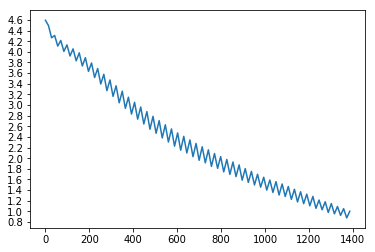

Losses diagram saved in TODO
Models and data saved in: encoder.pt, attn_decoder.pt, data_run

28 inputs constructed for testing ...

28 outputs predicted ...

Predictions written to ../output/toy.preprocessed-test.predicted.postprocessed.en
Blue score written to ../output/toy.preprocessed-test.BLEU
un pe@@ t@@ i@@ t j@@ et bl@@ an@@ c d@@ é@@ c@@ ol@@ l@@ ant , avec de l&apos; eau sur le c@@ ô@@ t@@ é . EOS
un petit jet blanc décollant , avec de l&apos; eau sur le côté . EOS
a w@@ om@@ an w@@ al@@ k@@ ing o@@ f@@ f with water t@@ o the side . EOS
a woman walking off with water to the side . EOS


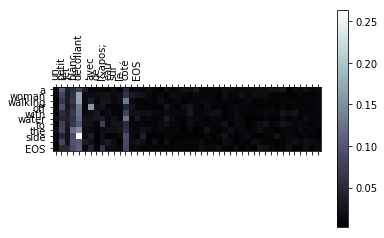

une re@@ m@@ or@@ qu@@ e en bo@@ is à qu@@ at@@ r@@ e r@@ ou@@ es g@@ ar@@ é@@ e sur une pl@@ at@@ e@@ for@@ me en bo@@ is . EOS
une remorque en bois à quatre roues garée sur une plateforme en bois . EOS
a w@@ om@@ an w@@ al@@ k@@ ing in the c@@ it@@ y EOS
a woman walking in the city EOS


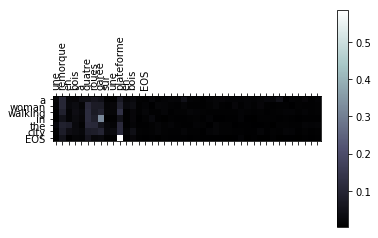

un h@@ om@@ me en p@@ an@@ t@@ al@@ on ra@@ y@@ é f@@ a@@ i@@ t un c@@ on@@ c@@ er@@ t . EOS
un homme en pantalon rayé fait un concert . EOS
a m@@ an and a w@@ om@@ an w@@ al@@ k@@ ing in the c@@ it@@ y EOS
a man and a woman walking in the city EOS


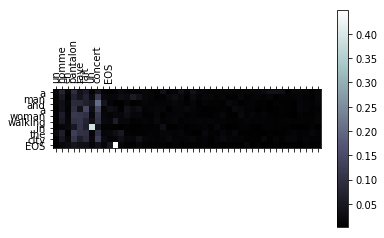

Attention diagrams saved in TODO


In [23]:
#### TOY DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 50
max_hours = 9
clip = 10

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    padding = False)


In [21]:
plot_every = math.floor(n_epochs * 28/500)
plot_every
len(plot_losses)

700

In [ ]:
#### TUTORIAL DATA - no BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 2


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = False, num_operations = 200, vocab_threshold = 2,
    padding = False)

In [ ]:
#### TUTORIAL DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 9


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 200, vocab_threshold = 2,
    padding = False)


Data files preprocessed ...

23133 inputs constructed for training ...

peak in loss diagram: 
 current loss 5.1405415534973145
avg prev loss 1.8553144066144611
epoch 1
sentence index 11812

peak in loss diagram: 
 current loss 5.158522923787435
avg prev loss 1.9699914623176713
epoch 1
sentence index 17070

peak in loss diagram: 
 current loss 5.40226223594264
avg prev loss 2.0743938498774503
epoch 1
sentence index 20965

peak in loss diagram: 
 current loss 5.092428684234619
avg prev loss 1.9394260051712555
epoch 2
sentence index 25

peak in loss diagram: 
 current loss 4.873987674713135
avg prev loss 1.8910762760997664
epoch 2
sentence index 906

peak in loss diagram: 
 current loss 4.928278069747122
avg prev loss 1.768983767949947
epoch 2
sentence index 3380

peak in loss diagram: 
 current loss 4.611093139648437
avg prev loss 1.7460173710098355
epoch 2
sentence index 3605

peak in loss diagram: 
 current loss 4.500809669494629
avg prev loss 1.674252365309305
epoch 2
sentence index 

peak in loss diagram: 
 current loss 4.351412963867188
avg prev loss 1.6070702290713075
epoch 3
sentence index 12989

peak in loss diagram: 
 current loss 4.446962709780093
avg prev loss 1.538406491333534
epoch 3
sentence index 13530

peak in loss diagram: 
 current loss 3.973174730936686
avg prev loss 1.559497345065401
epoch 3
sentence index 13991

peak in loss diagram: 
 current loss 4.748398158861243
avg prev loss 1.606437533697854
epoch 3
sentence index 14310

peak in loss diagram: 
 current loss 4.066158410274621
avg prev loss 1.5542637489164846
epoch 3
sentence index 14561

peak in loss diagram: 
 current loss 4.23735272442853
avg prev loss 1.4772307829281608
epoch 3
sentence index 14751

peak in loss diagram: 
 current loss 3.762761433919271
avg prev loss 1.415007652665628
epoch 3
sentence index 14944

peak in loss diagram: 
 current loss 4.07044677734375
avg prev loss 1.431303262691968
epoch 3
sentence index 15152

peak in loss diagram: 
 current loss 4.460591933306525
avg prev

peak in loss diagram: 
 current loss 3.8178507486979165
avg prev loss 1.5139246736016463
epoch 4
sentence index 8325

peak in loss diagram: 
 current loss 3.5416126251220703
avg prev loss 1.22017883674186
epoch 4
sentence index 8588

peak in loss diagram: 
 current loss 3.755664825439453
avg prev loss 1.3373649480327239
epoch 4
sentence index 8790

peak in loss diagram: 
 current loss 3.256683643047626
avg prev loss 1.2784517905871413
epoch 4
sentence index 9233

peak in loss diagram: 
 current loss 3.609020233154297
avg prev loss 1.285988962097701
epoch 4
sentence index 9827

peak in loss diagram: 
 current loss 4.070309448242187
avg prev loss 1.4167646333900492
epoch 4
sentence index 10076

peak in loss diagram: 
 current loss 3.933335440499442
avg prev loss 1.3301469057417912
epoch 4
sentence index 10193

peak in loss diagram: 
 current loss 3.452829187566584
avg prev loss 1.3430786027807013
epoch 4
sentence index 10310

peak in loss diagram: 
 current loss 3.409836695744441
avg pre

peak in loss diagram: 
 current loss 3.78324466281467
avg prev loss 1.3992165311172604
epoch 5
sentence index 1358

peak in loss diagram: 
 current loss 3.5003957112630206
avg prev loss 1.3985053841490334
epoch 5
sentence index 1438

peak in loss diagram: 
 current loss 3.4059110005696613
avg prev loss 1.3168021121709015
epoch 5
sentence index 1816

peak in loss diagram: 
 current loss 3.672649383544922
avg prev loss 1.3740986376908506
epoch 5
sentence index 1839

peak in loss diagram: 
 current loss 3.4637519836425783
avg prev loss 1.29954422345383
epoch 5
sentence index 1960

peak in loss diagram: 
 current loss 3.4469285011291504
avg prev loss 1.3212241069005188
epoch 5
sentence index 2066

peak in loss diagram: 
 current loss 3.3821222517225475
avg prev loss 1.339245518870169
epoch 5
sentence index 2424

peak in loss diagram: 
 current loss 3.702989487420945
avg prev loss 1.3379983888775218
epoch 5
sentence index 2443

peak in loss diagram: 
 current loss 3.820942687988281
avg prev

peak in loss diagram: 
 current loss 3.9823056175595237
avg prev loss 1.2884337410824442
epoch 5
sentence index 12081

peak in loss diagram: 
 current loss 3.5229970758611504
avg prev loss 1.3565290736916673
epoch 5
sentence index 12171

peak in loss diagram: 
 current loss 3.292577107747396
avg prev loss 1.2213857326023865
epoch 5
sentence index 12317

peak in loss diagram: 
 current loss 3.5656011962890624
avg prev loss 1.1590573269074604
epoch 5
sentence index 12366

peak in loss diagram: 
 current loss 3.4007928636338978
avg prev loss 1.3038590741893972
epoch 5
sentence index 12625

peak in loss diagram: 
 current loss 3.520773478916713
avg prev loss 1.3049523776969187
epoch 5
sentence index 12664

peak in loss diagram: 
 current loss 4.064798528497869
avg prev loss 1.3411542000034902
epoch 5
sentence index 12888

peak in loss diagram: 
 current loss 3.753133544921875
avg prev loss 1.4051094455067314
epoch 5
sentence index 12944

peak in loss diagram: 
 current loss 3.4838829040527

peak in loss diagram: 
 current loss 3.18107426961263
avg prev loss 1.1980209027979505
epoch 6
sentence index 1816

peak in loss diagram: 
 current loss 3.323966471354167
avg prev loss 1.2617646392723152
epoch 6
sentence index 1960

peak in loss diagram: 
 current loss 3.2021515369415283
avg prev loss 1.211781843641219
epoch 6
sentence index 2066

peak in loss diagram: 
 current loss 3.4167123274369673
avg prev loss 1.3144430161861151
epoch 6
sentence index 2131

peak in loss diagram: 
 current loss 3.0160784403483074
avg prev loss 1.1815382208415388
epoch 6
sentence index 2329

peak in loss diagram: 
 current loss 3.2928045060899525
avg prev loss 1.2115870413260992
epoch 6
sentence index 2424

peak in loss diagram: 
 current loss 3.670815658569336
avg prev loss 1.2633241334455656
epoch 6
sentence index 2640

peak in loss diagram: 
 current loss 4.050839875873766
avg prev loss 1.253826786322322
epoch 6
sentence index 2730

peak in loss diagram: 
 current loss 3.4806751069568453
avg pre

peak in loss diagram: 
 current loss 2.9593887329101562
avg prev loss 1.0565894593282699
epoch 6
sentence index 11312

peak in loss diagram: 
 current loss 3.541258352774161
avg prev loss 1.181379252421058
epoch 6
sentence index 11437

peak in loss diagram: 
 current loss 2.7741546630859375
avg prev loss 0.9947461591518284
epoch 6
sentence index 11535

peak in loss diagram: 
 current loss 2.713751359419389
avg prev loss 1.0127083444037726
epoch 6
sentence index 11798

peak in loss diagram: 
 current loss 4.189809799194336
avg prev loss 1.0937825662751792
epoch 6
sentence index 11812

peak in loss diagram: 
 current loss 2.9560755561379826
avg prev loss 1.1707810587710483
epoch 6
sentence index 11962

peak in loss diagram: 
 current loss 3.964071727934338
avg prev loss 1.2288116341087563
epoch 6
sentence index 12081

peak in loss diagram: 
 current loss 3.6384764451246996
avg prev loss 1.250432731978254
epoch 6
sentence index 12108

peak in loss diagram: 
 current loss 3.629906972249349

peak in loss diagram: 
 current loss 3.516225496927897
avg prev loss 1.3446119190288202
epoch 6
sentence index 20561

peak in loss diagram: 
 current loss 3.9545939518855167
avg prev loss 1.508556433570715
epoch 6
sentence index 20640

peak in loss diagram: 
 current loss 3.724926668054917
avg prev loss 1.330639892773273
epoch 6
sentence index 20774

peak in loss diagram: 
 current loss 3.5712569265654595
avg prev loss 1.371571657193233
epoch 6
sentence index 20806

peak in loss diagram: 
 current loss 5.27939164011102
avg prev loss 1.4387409197627972
epoch 6
sentence index 20965

peak in loss diagram: 
 current loss 3.187181555706522
avg prev loss 1.2715346879479097
epoch 6
sentence index 21245

peak in loss diagram: 
 current loss 3.6473257882254466
avg prev loss 1.436589401584732
epoch 6
sentence index 21392

peak in loss diagram: 
 current loss 3.4912595246967517
avg prev loss 1.395133609450137
epoch 6
sentence index 21411

peak in loss diagram: 
 current loss 4.11064197171119
avg 

peak in loss diagram: 
 current loss 3.1744048595428467
avg prev loss 1.0349294660111266
epoch 7
sentence index 6920

peak in loss diagram: 
 current loss 3.351700492527174
avg prev loss 1.0256888652721179
epoch 7
sentence index 6984

peak in loss diagram: 
 current loss 3.2372214275857676
avg prev loss 1.1428037273624796
epoch 7
sentence index 7076

peak in loss diagram: 
 current loss 3.085345928485577
avg prev loss 1.2143025653475208
epoch 7
sentence index 7215

peak in loss diagram: 
 current loss 3.314695798433744
avg prev loss 1.1762895305259236
epoch 7
sentence index 7313

peak in loss diagram: 
 current loss 3.254986706901999
avg prev loss 1.1259160360805225
epoch 7
sentence index 7370

peak in loss diagram: 
 current loss 3.1250350952148436
avg prev loss 1.1373769464598147
epoch 7
sentence index 7533

peak in loss diagram: 
 current loss 2.547397422790527
avg prev loss 1.0180508760135354
epoch 7
sentence index 7573

peak in loss diagram: 
 current loss 2.9384572882401314
avg p

peak in loss diagram: 
 current loss 3.658272443498884
avg prev loss 1.1403219012455217
epoch 7
sentence index 15190

peak in loss diagram: 
 current loss 4.114261851591222
avg prev loss 1.312059241501552
epoch 7
sentence index 15294

peak in loss diagram: 
 current loss 3.89628423055013
avg prev loss 1.2024872685905885
epoch 7
sentence index 15371

peak in loss diagram: 
 current loss 3.092649459838867
avg prev loss 1.0302349983132446
epoch 7
sentence index 15592

peak in loss diagram: 
 current loss 3.283390426635742
avg prev loss 1.1284535870794088
epoch 7
sentence index 15824

peak in loss diagram: 
 current loss 3.196291208267212
avg prev loss 1.2126611527661009
epoch 7
sentence index 16043

peak in loss diagram: 
 current loss 2.9466605413527716
avg prev loss 1.125135133935975
epoch 7
sentence index 16144

peak in loss diagram: 
 current loss 3.3547191619873047
avg prev loss 1.2199400634088928
epoch 7
sentence index 16213

peak in loss diagram: 
 current loss 3.552215576171875
av

peak in loss diagram: 
 current loss 3.1486862182617186
avg prev loss 1.104454714586755
epoch 8
sentence index 1816

peak in loss diagram: 
 current loss 3.4576010022844588
avg prev loss 1.1388369677524823
epoch 8
sentence index 1839

peak in loss diagram: 
 current loss 2.9549484252929688
avg prev loss 1.0819127933984165
epoch 8
sentence index 1960

peak in loss diagram: 
 current loss 3.624119005705181
avg prev loss 1.1044927777765943
epoch 8
sentence index 2098

peak in loss diagram: 
 current loss 3.0134897867838544
avg prev loss 1.1748385407106712
epoch 8
sentence index 2329

peak in loss diagram: 
 current loss 2.977831620436448
avg prev loss 1.1072855892976028
epoch 8
sentence index 2358

peak in loss diagram: 
 current loss 3.044198535737537
avg prev loss 1.1083555672274297
epoch 8
sentence index 2443

peak in loss diagram: 
 current loss 2.793649171528063
avg prev loss 1.0476698815390477
epoch 8
sentence index 2562

peak in loss diagram: 
 current loss 3.523661804199219
avg pr

peak in loss diagram: 
 current loss 2.6197659969329834
avg prev loss 0.9886918329008197
epoch 8
sentence index 9249

peak in loss diagram: 
 current loss 2.7534935691139917
avg prev loss 1.0187111819724433
epoch 8
sentence index 9341

peak in loss diagram: 
 current loss 3.153453133322976
avg prev loss 1.1409750101675145
epoch 8
sentence index 9468

peak in loss diagram: 
 current loss 2.852701895577567
avg prev loss 1.0395151525020356
epoch 8
sentence index 9656

peak in loss diagram: 
 current loss 2.8564384460449217
avg prev loss 0.9879513069801102
epoch 8
sentence index 9802

peak in loss diagram: 
 current loss 2.8096815745035806
avg prev loss 1.0790488365704338
epoch 8
sentence index 9851

peak in loss diagram: 
 current loss 3.248509724934896
avg prev loss 1.1699928914640774
epoch 8
sentence index 9936

peak in loss diagram: 
 current loss 3.63959223429362
avg prev loss 1.1880849406353138
epoch 8
sentence index 10076

peak in loss diagram: 
 current loss 2.5515067360617896
avg 

peak in loss diagram: 
 current loss 3.2003761927286782
avg prev loss 1.1182711581579776
epoch 8
sentence index 17139

peak in loss diagram: 
 current loss 3.1570093972342357
avg prev loss 1.2528397820339179
epoch 8
sentence index 17246

peak in loss diagram: 
 current loss 2.7359306812286377
avg prev loss 1.046185712059434
epoch 8
sentence index 17487

peak in loss diagram: 
 current loss 2.793473482131958
avg prev loss 0.9814905850696978
epoch 8
sentence index 17540

peak in loss diagram: 
 current loss 2.6708554719623767
avg prev loss 1.0554684292725278
epoch 8
sentence index 17658

peak in loss diagram: 
 current loss 4.459706046364524
avg prev loss 1.0282687364466379
epoch 8
sentence index 17746

peak in loss diagram: 
 current loss 3.2606504339920845
avg prev loss 1.183711493533485
epoch 8
sentence index 17843

peak in loss diagram: 
 current loss 2.8557247585720487
avg prev loss 1.1327736152769867
epoch 8
sentence index 18104

peak in loss diagram: 
 current loss 2.6483026123046

peak in loss diagram: 
 current loss 2.914557456970215
avg prev loss 1.0327553299925984
epoch 9
sentence index 3125

peak in loss diagram: 
 current loss 2.7956578731536865
avg prev loss 1.1112370822300988
epoch 9
sentence index 3236

peak in loss diagram: 
 current loss 2.9405874772505327
avg prev loss 0.9780160675204327
epoch 9
sentence index 3322

peak in loss diagram: 
 current loss 3.5659491497537363
avg prev loss 1.0849225877288464
epoch 9
sentence index 3438

peak in loss diagram: 
 current loss 2.6533050537109375
avg prev loss 0.9420642292397626
epoch 9
sentence index 3521

peak in loss diagram: 
 current loss 3.3221584955851235
avg prev loss 1.0408103984919252
epoch 9
sentence index 3604

peak in loss diagram: 
 current loss 3.3349264526367186
avg prev loss 1.1143220104767548
epoch 9
sentence index 3721

peak in loss diagram: 
 current loss 3.015619913736979
avg prev loss 1.0048442522167735
epoch 9
sentence index 3854

peak in loss diagram: 
 current loss 3.7087570716594827
av

peak in loss diagram: 
 current loss 2.3341969384087458
avg prev loss 0.9233899331418033
epoch 9
sentence index 10781

peak in loss diagram: 
 current loss 2.5184192657470703
avg prev loss 0.9502648224137792
epoch 9
sentence index 10811

peak in loss diagram: 
 current loss 2.9038614545549666
avg prev loss 1.0781147827970192
epoch 9
sentence index 10934

peak in loss diagram: 
 current loss 2.660513951228215
avg prev loss 1.014382766679165
epoch 9
sentence index 11021

peak in loss diagram: 
 current loss 2.5087523460388184
avg prev loss 0.9537663332426817
epoch 9
sentence index 11294

peak in loss diagram: 
 current loss 2.8042121555494224
avg prev loss 0.8759384525410212
epoch 9
sentence index 11312

peak in loss diagram: 
 current loss 2.6476912865271935
avg prev loss 0.991703003156852
epoch 9
sentence index 11432

peak in loss diagram: 
 current loss 2.409330368041992
avg prev loss 0.8664261554270672
epoch 9
sentence index 11535

peak in loss diagram: 
 current loss 2.6143822048021

peak in loss diagram: 
 current loss 2.8348398710552014
avg prev loss 1.1136349692131002
epoch 9
sentence index 18373

peak in loss diagram: 
 current loss 3.093165503607856
avg prev loss 1.0436926805245326
epoch 9
sentence index 18440

peak in loss diagram: 
 current loss 2.731170360858624
avg prev loss 1.012680309579646
epoch 9
sentence index 18526

peak in loss diagram: 
 current loss 3.2513809204101562
avg prev loss 1.168639470636312
epoch 9
sentence index 18673

peak in loss diagram: 
 current loss 2.420028868175688
avg prev loss 0.9662073977548259
epoch 9
sentence index 18773

peak in loss diagram: 
 current loss 3.195350993763317
avg prev loss 1.0852386098640052
epoch 9
sentence index 18848

peak in loss diagram: 
 current loss 2.7346763610839844
avg prev loss 1.0454896669733904
epoch 9
sentence index 18903

peak in loss diagram: 
 current loss 3.2969771165114183
avg prev loss 1.1448636054431551
epoch 9
sentence index 19029

peak in loss diagram: 
 current loss 2.864904291489545

peak in loss diagram: 
 current loss 3.1048096550835504
avg prev loss 0.9602175596310891
epoch 10
sentence index 3854

peak in loss diagram: 
 current loss 2.588928787796586
avg prev loss 0.9854107649326516
epoch 10
sentence index 3879

peak in loss diagram: 
 current loss 2.52618222623258
avg prev loss 0.9507777440281758
epoch 10
sentence index 3984

peak in loss diagram: 
 current loss 2.412808532714844
avg prev loss 0.9586020970205732
epoch 10
sentence index 4071

peak in loss diagram: 
 current loss 2.6142850603376115
avg prev loss 1.0308183118130012
epoch 10
sentence index 4189

peak in loss diagram: 
 current loss 2.410408443874783
avg prev loss 0.9396753022118745
epoch 10
sentence index 4291

peak in loss diagram: 
 current loss 2.6858199624454273
avg prev loss 1.009593298177326
epoch 10
sentence index 4408

peak in loss diagram: 
 current loss 2.6673014322916666
avg prev loss 1.0373541008338625
epoch 10
sentence index 4522

peak in loss diagram: 
 current loss 2.443323669433594

peak in loss diagram: 
 current loss 2.518965802873884
avg prev loss 0.9246006923992206
epoch 10
sentence index 11399

peak in loss diagram: 
 current loss 2.256422424316406
avg prev loss 0.8919248993421998
epoch 10
sentence index 11535

peak in loss diagram: 
 current loss 2.3903112972483918
avg prev loss 0.8832801027128933
epoch 10
sentence index 11601

peak in loss diagram: 
 current loss 2.729184358016304
avg prev loss 0.8553151340695334
epoch 10
sentence index 11681

peak in loss diagram: 
 current loss 2.305565920743075
avg prev loss 0.8367675861788952
epoch 10
sentence index 11798

peak in loss diagram: 
 current loss 3.035055662456312
avg prev loss 0.9404169880495781
epoch 10
sentence index 11870

peak in loss diagram: 
 current loss 2.6278271394617416
avg prev loss 1.0414991767038326
epoch 10
sentence index 12022

peak in loss diagram: 
 current loss 2.6440491146511502
avg prev loss 0.9979597993027696
epoch 10
sentence index 12073

peak in loss diagram: 
 current loss 2.918663

peak in loss diagram: 
 current loss 3.040750732421875
avg prev loss 0.9380450325656721
epoch 10
sentence index 18673

peak in loss diagram: 
 current loss 3.2606849670410156
avg prev loss 0.99172727027019
epoch 10
sentence index 18848

peak in loss diagram: 
 current loss 3.266104081097771
avg prev loss 1.0678375094328603
epoch 10
sentence index 18902

peak in loss diagram: 
 current loss 3.1574959388146033
avg prev loss 1.128752957339383
epoch 10
sentence index 19029

peak in loss diagram: 
 current loss 2.5050296783447266
avg prev loss 0.9610462993453994
epoch 10
sentence index 19090

peak in loss diagram: 
 current loss 3.0467203140258787
avg prev loss 1.0095591711880334
epoch 10
sentence index 19301

peak in loss diagram: 
 current loss 2.6951153094951925
avg prev loss 0.9665634146300864
epoch 10
sentence index 19394

peak in loss diagram: 
 current loss 2.9101149460365034
avg prev loss 1.1178621406067693
epoch 10
sentence index 19484

peak in loss diagram: 
 current loss 2.897999

peak in loss diagram: 
 current loss 2.5637499491373696
avg prev loss 0.9395657310779224
epoch 11
sentence index 3748

peak in loss diagram: 
 current loss 2.6618480682373047
avg prev loss 1.0022287896149533
epoch 11
sentence index 3854

peak in loss diagram: 
 current loss 3.3816315223430764
avg prev loss 0.9258097662150871
epoch 11
sentence index 3937

peak in loss diagram: 
 current loss 2.431200547651811
avg prev loss 0.9103440705133299
epoch 11
sentence index 4056

peak in loss diagram: 
 current loss 2.5838080814906528
avg prev loss 1.0090423927728827
epoch 11
sentence index 4189

peak in loss diagram: 
 current loss 2.544222412109375
avg prev loss 0.922295627966482
epoch 11
sentence index 4267

peak in loss diagram: 
 current loss 2.480809238978795
avg prev loss 0.9047954118586621
epoch 11
sentence index 4369

peak in loss diagram: 
 current loss 2.6353688673539595
avg prev loss 1.013838191945359
epoch 11
sentence index 4438

peak in loss diagram: 
 current loss 2.33443668910435

peak in loss diagram: 
 current loss 2.9772531509399416
avg prev loss 0.9339440224990931
epoch 11
sentence index 11067

peak in loss diagram: 
 current loss 2.3660476207733154
avg prev loss 0.9064823752195109
epoch 11
sentence index 11156

peak in loss diagram: 
 current loss 2.098816394805908
avg prev loss 0.8220361566668939
epoch 11
sentence index 11244

peak in loss diagram: 
 current loss 2.311588832310268
avg prev loss 0.9090591971919308
epoch 11
sentence index 11361

peak in loss diagram: 
 current loss 3.4995399757667824
avg prev loss 0.8666188794324953
epoch 11
sentence index 11437

peak in loss diagram: 
 current loss 2.322892761230469
avg prev loss 0.8285619565604407
epoch 11
sentence index 11542

peak in loss diagram: 
 current loss 2.4746301070503565
avg prev loss 0.8524093221650222
epoch 11
sentence index 11681

peak in loss diagram: 
 current loss 2.440233750776811
avg prev loss 0.8424266025119692
epoch 11
sentence index 11798

peak in loss diagram: 
 current loss 3.27792

peak in loss diagram: 
 current loss 2.918493482801649
avg prev loss 0.8974771942068871
epoch 11
sentence index 18440

peak in loss diagram: 
 current loss 2.7891998291015625
avg prev loss 1.029884845363219
epoch 11
sentence index 18538

peak in loss diagram: 
 current loss 2.7185345818014706
avg prev loss 0.9734901473805234
epoch 11
sentence index 18640

peak in loss diagram: 
 current loss 2.333204905192057
avg prev loss 0.9017181096385686
epoch 11
sentence index 18773

peak in loss diagram: 
 current loss 3.2197754599831323
avg prev loss 1.0203866709189453
epoch 11
sentence index 18848

peak in loss diagram: 
 current loss 3.3362513575060615
avg prev loss 1.0198148329482473
epoch 11
sentence index 18945

peak in loss diagram: 
 current loss 2.572025074678309
avg prev loss 1.027954038331731
epoch 11
sentence index 19115

peak in loss diagram: 
 current loss 2.6652188301086426
avg prev loss 0.9330244774798593
epoch 11
sentence index 19144

peak in loss diagram: 
 current loss 3.077477

peak in loss diagram: 
 current loss 2.3530897521972656
avg prev loss 0.9059317878260553
epoch 12
sentence index 3104

peak in loss diagram: 
 current loss 2.266576232910156
avg prev loss 0.8630762812990623
epoch 12
sentence index 3306

peak in loss diagram: 
 current loss 4.023616956627888
avg prev loss 0.9785430312295077
epoch 12
sentence index 3438

peak in loss diagram: 
 current loss 2.3525579352127877
avg prev loss 0.8618808719675417
epoch 12
sentence index 3521

peak in loss diagram: 
 current loss 3.2000646591186523
avg prev loss 0.9135720799579616
epoch 12
sentence index 3604

peak in loss diagram: 
 current loss 3.11535400390625
avg prev loss 0.9980679425061684
epoch 12
sentence index 3721

peak in loss diagram: 
 current loss 2.5068001217312283
avg prev loss 0.9209786269589246
epoch 12
sentence index 3854

peak in loss diagram: 
 current loss 2.3313739483173075
avg prev loss 0.9201352724785695
epoch 12
sentence index 3905

peak in loss diagram: 
 current loss 2.2452276403253

peak in loss diagram: 
 current loss 1.9038993172023608
avg prev loss 0.6995891850205002
epoch 12
sentence index 10606

peak in loss diagram: 
 current loss 2.2061124341241243
avg prev loss 0.8192579970929637
epoch 12
sentence index 10765

peak in loss diagram: 
 current loss 2.504756655011858
avg prev loss 0.8228489236761363
epoch 12
sentence index 10811

peak in loss diagram: 
 current loss 2.7664587838309154
avg prev loss 0.9858259509010078
epoch 12
sentence index 10934

peak in loss diagram: 
 current loss 2.454922602726863
avg prev loss 0.9043770639532949
epoch 12
sentence index 11021

peak in loss diagram: 
 current loss 2.1888172315514605
avg prev loss 0.8437983059220894
epoch 12
sentence index 11227

peak in loss diagram: 
 current loss 2.6286397187606148
avg prev loss 0.7409590929195524
epoch 12
sentence index 11312

peak in loss diagram: 
 current loss 2.2969193091759315
avg prev loss 0.8937324852731539
epoch 12
sentence index 11432

peak in loss diagram: 
 current loss 2.128

peak in loss diagram: 
 current loss 2.735430682146991
avg prev loss 1.075594930162321
epoch 12
sentence index 17910

peak in loss diagram: 
 current loss 2.6855408163631664
avg prev loss 0.919817654311865
epoch 12
sentence index 18030

peak in loss diagram: 
 current loss 2.6086945003933377
avg prev loss 0.9703144854448478
epoch 12
sentence index 18104

peak in loss diagram: 
 current loss 2.6167398071289063
avg prev loss 0.845969488089585
epoch 12
sentence index 18222

peak in loss diagram: 
 current loss 2.5691412062872026
avg prev loss 1.0142231085226066
epoch 12
sentence index 18354

peak in loss diagram: 
 current loss 2.908670425415039
avg prev loss 0.9122017625777896
epoch 12
sentence index 18440

peak in loss diagram: 
 current loss 2.2271510037508877
avg prev loss 0.8795105233881989
epoch 12
sentence index 18506

peak in loss diagram: 
 current loss 2.7726123286228552
avg prev loss 1.0539903297490805
epoch 12
sentence index 18640

peak in loss diagram: 
 current loss 2.163477

peak in loss diagram: 
 current loss 2.3982979269588696
avg prev loss 0.8565638001405637
epoch 13
sentence index 1992

peak in loss diagram: 
 current loss 2.52195798433744
avg prev loss 0.9049300906788269
epoch 13
sentence index 2078

peak in loss diagram: 
 current loss 2.2424749755859374
avg prev loss 0.8963148214131003
epoch 13
sentence index 2315

peak in loss diagram: 
 current loss 2.3947638234784527
avg prev loss 0.8519096586478715
epoch 13
sentence index 2371

peak in loss diagram: 
 current loss 2.500422636667887
avg prev loss 0.9549335719015936
epoch 13
sentence index 2479

peak in loss diagram: 
 current loss 2.4634875593514276
avg prev loss 0.9395487394816711
epoch 13
sentence index 2589

peak in loss diagram: 
 current loss 3.068598897833573
avg prev loss 0.930850114219955
epoch 13
sentence index 2730

peak in loss diagram: 
 current loss 3.1982759748186385
avg prev loss 0.9733253844519849
epoch 13
sentence index 2863

peak in loss diagram: 
 current loss 2.58248286093434

peak in loss diagram: 
 current loss 2.2387537802419355
avg prev loss 0.8675522891020826
epoch 13
sentence index 9602

peak in loss diagram: 
 current loss 2.057783203125
avg prev loss 0.8176434457643118
epoch 13
sentence index 9710

peak in loss diagram: 
 current loss 2.5997950236002603
avg prev loss 0.7705997470233733
epoch 13
sentence index 9802

peak in loss diagram: 
 current loss 2.424192156110491
avg prev loss 0.9539748279672301
epoch 13
sentence index 9875

peak in loss diagram: 
 current loss 2.5545637130737306
avg prev loss 1.000447164343253
epoch 13
sentence index 10066

peak in loss diagram: 
 current loss 3.7112330118815104
avg prev loss 0.9145957678211066
epoch 13
sentence index 10076

peak in loss diagram: 
 current loss 2.5786192757742747
avg prev loss 0.8292107508548477
epoch 13
sentence index 10193

peak in loss diagram: 
 current loss 2.4709393427922177
avg prev loss 0.8990225359022856
epoch 13
sentence index 10279

peak in loss diagram: 
 current loss 2.52667255401

peak in loss diagram: 
 current loss 2.5089352256373356
avg prev loss 0.9414227871678209
epoch 13
sentence index 16772

peak in loss diagram: 
 current loss 2.5617817149442783
avg prev loss 0.9023698260466483
epoch 13
sentence index 16886

peak in loss diagram: 
 current loss 2.56413330078125
avg prev loss 0.9658111329977845
epoch 13
sentence index 17056

peak in loss diagram: 
 current loss 2.769606454031808
avg prev loss 0.9781706792831776
epoch 13
sentence index 17113

peak in loss diagram: 
 current loss 2.959682630456012
avg prev loss 0.9713805823862397
epoch 13
sentence index 17200

peak in loss diagram: 
 current loss 2.6978304632778825
avg prev loss 0.993987722514103
epoch 13
sentence index 17271

peak in loss diagram: 
 current loss 2.609869639078776
avg prev loss 0.9024962027160103
epoch 13
sentence index 17372

peak in loss diagram: 
 current loss 2.782662868499756
avg prev loss 0.8146908363141607
epoch 13
sentence index 17487

peak in loss diagram: 
 current loss 2.86587503

peak in loss diagram: 
 current loss 2.579235679224918
avg prev loss 1.0250922496182644
epoch 14
sentence index 1102

peak in loss diagram: 
 current loss 2.6410176203801083
avg prev loss 0.9636955605379158
epoch 14
sentence index 1144

peak in loss diagram: 
 current loss 2.438153372870551
avg prev loss 0.9388334698519337
epoch 14
sentence index 1290

peak in loss diagram: 
 current loss 3.41285733823423
avg prev loss 0.9002860636370777
epoch 14
sentence index 1358

peak in loss diagram: 
 current loss 2.712107849121094
avg prev loss 0.9194224467771545
epoch 14
sentence index 1438

peak in loss diagram: 
 current loss 3.011395634831609
avg prev loss 0.9690206068072075
epoch 14
sentence index 1538

peak in loss diagram: 
 current loss 2.380236915920092
avg prev loss 0.8629595964495855
epoch 14
sentence index 1659

peak in loss diagram: 
 current loss 2.812635040283203
avg prev loss 0.929037852486734
epoch 14
sentence index 1816

peak in loss diagram: 
 current loss 2.7020315442766463
a

peak in loss diagram: 
 current loss 3.2860089470358456
avg prev loss 0.9212038556164387
epoch 14
sentence index 8262

peak in loss diagram: 
 current loss 2.3342196146647134
avg prev loss 0.8955035554685326
epoch 14
sentence index 8368

peak in loss diagram: 
 current loss 1.9848832217129795
avg prev loss 0.7786726544105833
epoch 14
sentence index 8451

peak in loss diagram: 
 current loss 2.1079032204367896
avg prev loss 0.7241869198736484
epoch 14
sentence index 8559

exceeded max hours 10
Training finished ...



<Figure size 432x288 with 0 Axes>

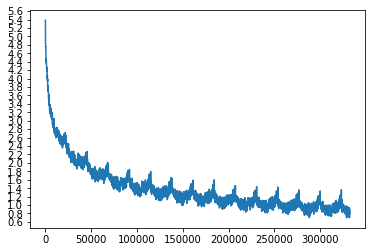

Losses diagram saved in TODO
Models and data saved in: encoder.pt, attn_decoder.pt, data_run

789 inputs constructed for testing ...

789 outputs predicted ...

Predictions written to ../output/val.preprocessed-test.predicted.postprocessed.en
Blue score written to ../output/val.preprocessed-test.BLEU
des gens sur la pla@@ ge regar@@ d@@ ent un c@@ œ@@ ur <UNKNOWN> dans le ci@@ e@@ l pa@@ r un <UNKNOWN> <UNKNOWN> . EOS
des gens sur la plage regardent un cœur <UNKNOWN> dans le ciel par un <UNKNOWN> <UNKNOWN> . EOS
people are at the bea@@ ch loo@@ k on the h@@ ea@@ d of the <UNKNOWN> in the <UNKNOWN> of a <UNKNOWN> . EOS
people are at the beach look on the head of the <UNKNOWN> in the <UNKNOWN> of a <UNKNOWN> . EOS


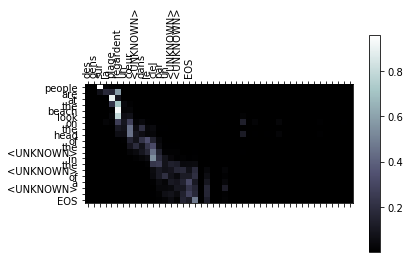

<UNKNOWN> <UNKNOWN> se pro@@ d@@ ui@@ t l@@ ors d&apos; un con@@ c@@ er@@ t . EOS
<UNKNOWN> <UNKNOWN> se produit lors d&apos; un concert . EOS
<UNKNOWN> <UNKNOWN> is re@@ a@@ ding at a con@@ c@@ er@@ t . EOS
<UNKNOWN> <UNKNOWN> is reading at a concert . EOS


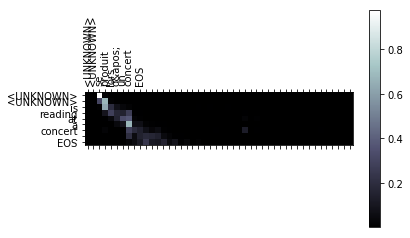

trois hommes blan@@ c@@ s en t-@@ shir@@ ts sau@@ t@@ ent en l&apos; air . EOS
trois hommes blancs en t-shirts sautent en l&apos; air . EOS
three white men in blue shir@@ ts are jum@@ ping in mi@@ d@@ air . EOS
three white men in blue shirts are jumping in midair . EOS


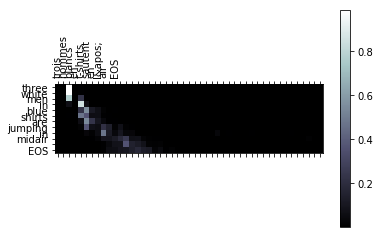

Attention diagrams saved in TODO


In [8]:
#### TRAIN and TEST DATA using BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_epochs = 15
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False
MAX_LENGTH = 17
plot_every = 100

(encoder, attn_decoder, slang, tlang, plot_losses, max_bpe_length) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_val, fp.tpath_val, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False)


In [ ]:
#### TRAIN and TEST DATA no BPE

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 80000
max_hours = 8

MAX_LENGTH = 25
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = False, 
    padding = False)


In [ ]:
import filepaths as fp
import data_preparation as dp

from plots import showLosses, showAttention
from data_processing import preprocess, postprocess

def sanity_check(spath_train, tpath_train, 
        spath_test, tpath_test, 
        fn_train, fn_predict_all,
        max_sentence_length = 50, 
        replace_unknown_words = True, 
        use_bpe = True, num_operations = 400, vocab_threshold = 5,
        padding = True):

    # data preprocessing
    (spath_train_pp, tpath_train_pp, spath_test_pp, tpath_test_pp) = preprocess(
        spath_train, tpath_train, spath_test, tpath_test, 
        max_sentence_length,
        replace_unknown_words, 
        use_bpe, num_operations, vocab_threshold)

    print (f'Data files preprocessed ...')
    print ()
    
    # data structures for training
    (slang, tlang, index_array_pairs, s_index_arrays_test, max_bpe_length) = dp.prepare_data(
        spath_train_pp, tpath_train_pp, spath_test_pp, padding)
        
    return slang, tlang, index_array_pairs, max_bpe_length



In [ ]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 300000
max_hours = 10
clip = 8
use_bpe = True
replace_unknown_words = True
padding = False


MAX_LENGTH = 17
slang, tlang, index_array_pairs, max_bpe_length = sanity_check(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    sanity_ckeck, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = replace_unknown_words, 
    use_bpe = use_bpe, 
    padding = padding)


In [ ]:
for i in [0,1, 10000, 20000, 28317, 28318]:
    print(dp.sentenceFromIndexes(slang, index_array_pairs[i][0]))
    print(dp.sentenceFromIndexes(tlang, index_array_pairs[i][1]))
    print()

In [4]:
#encoder, attn_decoder, slang, tlang

EncoderRNN(
  (embedding): Embedding(114, 256)
  (gru): GRU(256, 256)
)

In [128]:
import data_preparation as dp

s_sentence = 'une a@@ b@@ e@@ il@@ le pl@@ an@@ ant a@@ u@@ -@@ de@@ s@@ su@@ s de f@@ l@@ e@@ ur@@ s v@@ i@@ ol@@ e@@ t@@ t@@ es et or@@ an@@ g@@ es .'
s_words = s_sentence.split(' ')
s_indices = dp.indexesFromSentence(
    slang, 
    s_sentence
)

t, a = predict(
        encoder, attn_decoder, s_indices, max_bpe_length)

t_words = dp.wordsFromIndexes(tlang,t)
A = a.numpy() # 19 output * 60 input

In [97]:
s_sentence.replace('@@ ', '')

'une abeille planant au-dessus de fleurs violettes et oranges .'

In [130]:
import numpy as np

merge_indices = [i for i, w in enumerate(s_words) if w.endswith('@@')]
resulting_columns = []
merge_column = np.array([])
resulting_words = []
merge_word = ''
for i, column in enumerate(A.T):
    if not merge_column.any():
        merge_column = column
        merge_word = s_words[i] if i < len(s_words) else ''
    else:
        merge_column = (merge_column + column)
        merge_word += s_words[i]
    if i not in merge_indices:
        resulting_words.append(merge_word)
        resulting_columns.append(merge_column)
        merge_column = np.array([])

In [131]:
resulting_words

['une',
 'a@@b@@e@@il@@le',
 'pl@@an@@ant',
 'a@@u@@-@@de@@s@@su@@s',
 'de',
 'f@@l@@e@@ur@@s',
 'v@@i@@ol@@e@@t@@t@@es',
 'et',
 'or@@an@@g@@es',
 '.',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [132]:
X = np.column_stack(resulting_columns)
X.shape

(19, 35)

In [133]:
merge_indices = [i for i, w in enumerate(t_words) if w.endswith('@@')]
resulting_rows = []
merge_row = np.array([])
resulting_words = []
merge_word = ''
for i, row in enumerate(X):
    if not merge_row.any():
        merge_row = row
        merge_word = t_words[i] if i < len(t_words) else ''
    else:
        merge_row = (merge_row + row)/2.
        merge_word += t_words[i]
    if i not in merge_indices:
        resulting_words.append(merge_word)
        resulting_rows.append(merge_row)
        merge_row = np.array([])

In [134]:
len(resulting_rows)

9

In [135]:
resulting_words

['a',
 'wat@@er@@f@@all',
 'in',
 'a',
 'for@@e@@s@@t',
 'with',
 'm@@an@@y',
 't@@re@@es',
 'EOS']

In [137]:
sum(resulting_rows[5])

0.999999986961484

In [ ]:
resulting_rows = []
merge_row = np.array([])
for i, row in enumerate(A):
    if i > len(merge_indices):
        break    
    if not merge_column.any():
        merge_column = column
    else:
        merge_column = (merge_column + column)/2.
    if i not in merge_indices:
        resulting_columns.append(merge_column)
        merge_column = np.array([])

In [139]:
mj = np.column_stack(resulting_columns)

In [140]:
mj.shape

(19, 35)

In [142]:
sum(mj[5])

1.0000000128056854

In [147]:
def merge_bpe_s(s_words, A):
    merge_indices = [i for i, w in enumerate(s_words) if w.endswith('@@')]
    resulting_columns = []
    merge_column = np.array([])
    resulting_words = []
    merge_word = ''
    for i, column in enumerate(A.T):
        if not merge_column.any():
            merge_column = column
            merge_word = s_words[i] if i < len(s_words) else ''
        else:
            merge_column = (merge_column + column)
            merge_word += s_words[i]
        if i not in merge_indices:
            resulting_words.append(merge_word)
            resulting_columns.append(merge_column)
            merge_column = np.array([])
    return resulting_words, np.column_stack(resulting_columns)
        
def merge_bpe_t(t_words, X):
    merge_indices = [i for i, w in enumerate(t_words) if w.endswith('@@')]
    resulting_rows = []
    merge_row = np.array([])
    resulting_words = []
    merge_word = ''
    for i, row in enumerate(X):
        if not merge_row.any():
            merge_row = row
            merge_word = t_words[i] if i < len(t_words) else ''
        else:
            merge_row = (merge_row + row)/2.
            merge_word += t_words[i]
        if i not in merge_indices:
            resulting_words.append(merge_word)
            resulting_rows.append(merge_row)
            merge_row = np.array([])
    return resulting_words, np.row_stack(resulting_rows)
        
def merge_bpe(s_words, output_w, a):
    s_words_merged, X = merge_bpe_s(s_words, A)
    t_words_merged, attentions = merge_bpe_t(t_words, X)
    return (s_words_merged, t_words_merged, attentions)

q,r,s = merge_bpe(s_words, t_words, A)

In [153]:
len(q)

35

In [156]:
sum(s[0])

1.000000053900294

In [13]:
#from itertools import chain
chain(encoder.parameters(), attn_decoder.parameters())

<generator object chain at 0x7fb5ecfcd0a0>

In [10]:
def xchain(*iterables):
    # chain('ABC', 'DEF') --> A B C D E F
    for it in iterables:
        for element in it:
            yield element

In [12]:
encoder.parameters()

<generator object Module.parameters at 0x7fb5ecfcd728>

In [7]:
import math
math.ceil(1.2)

2